In [1]:
import os
import pandas as pd
import seaborn as sns

from itertools import cycle
import matplotlib.lines as mlines
from matplotlib import pyplot as plt

In [ ]:
markers = ["*", "o", "h", "v", "P", "s", "p", "x", "D", "8"]
marker_cycle = cycle(markers)


In [4]:
plots_dir = "plots"


In [5]:
fontsize = 20

In [6]:
COLORING_PROGRAM = "coloring"
DIJKSTRA_PROGRAM = "dijkstra_token_ring"
MAX_MATCHING_PROGRAM = "maximal_matching"

In [7]:
program = COLORING_PROGRAM

In [8]:
model = "lstm_trained_at_2025_04_26_14_01"

In [9]:
graph_name = "star_graph_n7"
graph_name = "graph_powerlaw_cluster_graph_n7"
graph_name = "graph_random_regular_graph_n7_d4"
graph_name = "star_graph_n13"
graph_name = "graph_powerlaw_cluster_graph_n8"
graph_name = "graph_powerlaw_cluster_graph_n9"
graph_name = "graph_random_regular_graph_n8_d4"
# graph_name = "graph_random_regular_graph_n9_d4"

In [10]:
result_type = "cvf"

In [11]:
filepath = os.path.join("ml_predictions", f"{model}__{graph_name}__{result_type}.csv")
df = pd.read_csv(filepath, index_col=0)
if 'fa_count' in df.columns:
    df = df[['rank effect', 'ml_count', 'fa_count']]
    df = df.rename(columns={'ml_count': 'ML Count', 'fa_count': 'FA count'})
else:
    df = df[['rank effect', 'ml_count']]
    df = df.rename(columns={'ml_count': 'ML Count'})
df

,rank effect,ML Count,FA count
0,-4.0,35,0.0
1,-3.0,11373,7680.0
2,-2.0,591929,584800.0
3,-1.0,3138439,3285560.0
4,0.0,5016445,4743920.0
5,1.0,3138441,3285560.0
6,2.0,591930,584800.0
7,3.0,11373,7680.0
8,4.0,35,0.0


In [12]:
df = df.set_index('rank effect', drop=True)
df

,ML Count,FA count
rank effect,,
-4.0,35,0.0
-3.0,11373,7680.0
-2.0,591929,584800.0
-1.0,3138439,3285560.0
0.0,5016445,4743920.0
1.0,3138441,3285560.0
2.0,591930,584800.0
3.0,11373,7680.0
4.0,35,0.0


In [13]:
def get_title():
    result = " ".join(graph_name.split("_")).title()
    return result

Saved plot(s) for plots/RE__coloring__graph_random_regular_graph_n8_d4__lstm_trained_at_2025_04_26_14_01.png


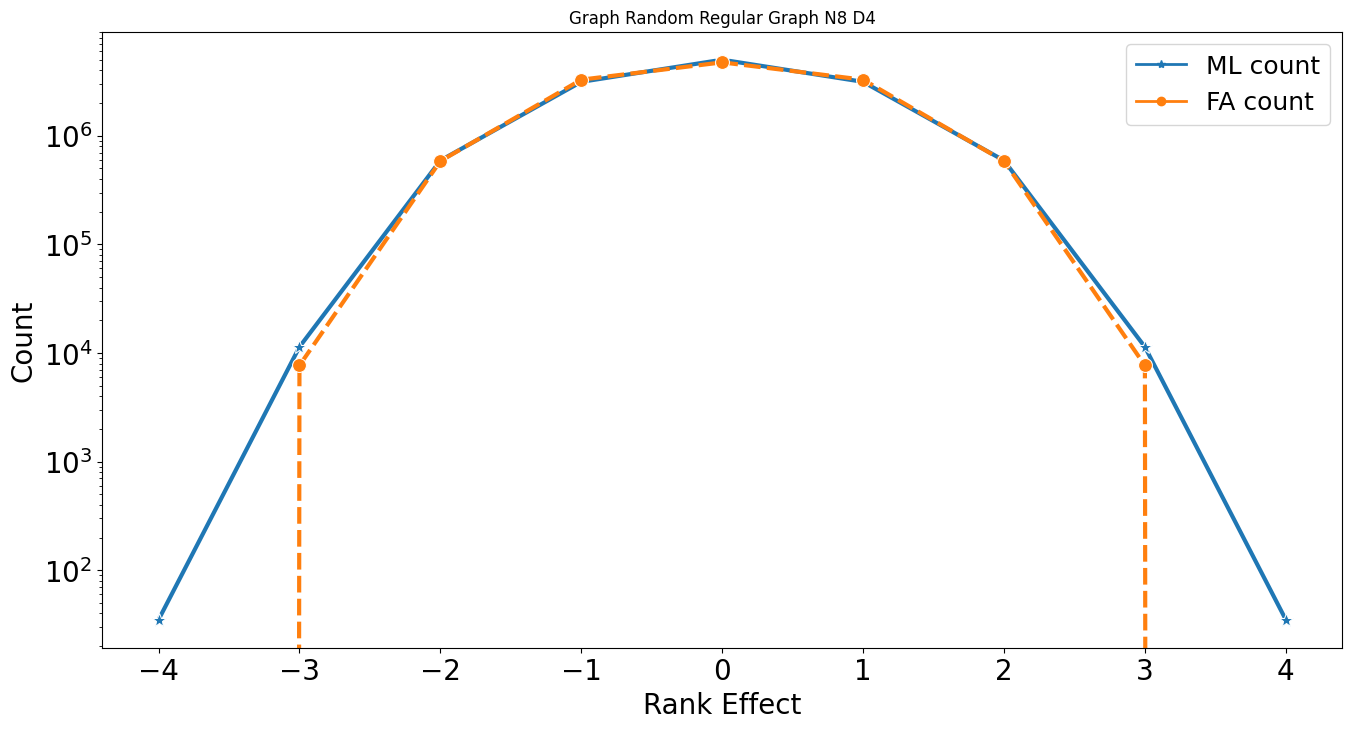

In [14]:
plt.figure(figsize=(16, 8))

ax = sns.lineplot(data=df, linewidth=3, markersize=10)

for i, line in enumerate(ax.lines):
    line.set_marker(next(marker_cycle))

ax.set_xlabel("Rank Effect")

ax.set_yscale("log")
ax.set_ylabel("Count")
ax.tick_params(axis="x", labelsize=fontsize)
ax.tick_params(axis="y", labelsize=fontsize)
ax.xaxis.label.set_size(fontsize)
ax.yaxis.label.set_size(fontsize)

ax.set_title(get_title())

file_name = f"RE__{program}__{graph_name}__{model}.png"

custom_lines = [
    mlines.Line2D([], [], color=line.get_color(), marker=marker, label=cat, linewidth=2)
    for line, marker, cat in zip(ax.lines, markers, ['ML count','FA count'])
]
# plt.legend(handles=custom_lines)

plt.rc("font", size=fontsize)
plt.legend(handles=custom_lines,fontsize=fontsize * 0.9)  # using a size in points
# plt.savefig(
#     os.path.join(
#         plots_dir,
#         f"{file_name}",
#     ),
#     bbox_inches="tight",
# )
# plt.close()

print(f"Saved plot(s) for plots/{file_name}")